### Correlation & Regression

Correlation is a measure of the dependence/proportionality of one variable and another. In other words, how one variable rises or falls with another. Correlation does not imply causation, though causation implies correlation (though not necessarily linear), so correlation suggest at causation, at least in the absence of an obvious lack of possible mechanisms.

The value of the correlation (i.e., correlation coefficient) does not depend on the specific measurement units used; for example, the correlation between height and weight will be identical regardless of whether inches and pounds, or centimeters and kilograms are used as measurement units. 

Obviously, correlation does not imply causation. Things can correlate at random. But causation means that one variable causes a change in another variable, which must mean that there is correlation. This is perhaps not absolutely true in a technical sense all the time, though I strongly suspect it, but in a conceptual sense it absolutely is. And if causation causes correlation, then correlation at least hints at causation. There are two hypotheses for the observed correlation, that is, causation and randomness. Even if randomness had been the most likely candidate by far, causation would still carry some small fragment of the credence available. Thus observing correlation makes causation more likely than before.

There are multiple measures of correlation. These are the most popular ones.

#### Linear Correlation
* Pearson's r

#### Rank Correlation
* Spearman's Rho 
* Kendall's Tau

##### References
* https://en.wikipedia.org/wiki/Correlation_and_dependence
* https://stats.stackexchange.com/questions/26300/does-causation-imply-correlation
* https://en.wikipedia.org/wiki/Correlation_coefficient
* https://en.wikipedia.org/wiki/Rank_correlation
* https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Definition
* http://www.tylervigen.com/spurious-correlations

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
from scipy.stats import spearmanr, kendalltau
import math

Correlation is just one of multiple ways to describe bi-variate data. Examples of other sensible statistics/parameters are marking the means and marking the standard deviations of each list. Ultimately, we are after describing the data (population), each computed parameter/statistic adding some amount of usefull information.

The regression line's (fitted line) slope is equal to pearson's r correlation coefficient.

* https://sebastianraschka.com/faq/docs/pearson-r-vs-linear-regr.html
* https://en.wikipedia.org/wiki/Simple_linear_regression

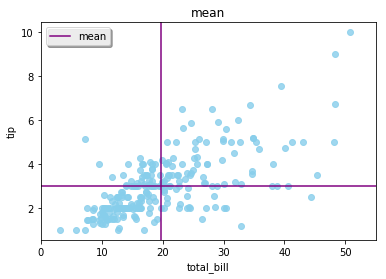

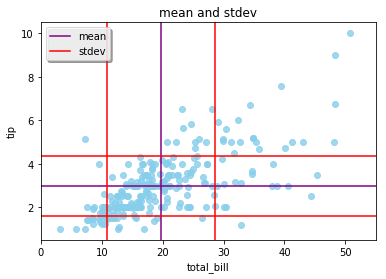

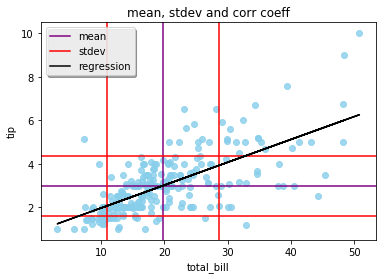

In [128]:
# Generate x and y lists
#x = np.arange(1,11,1)
#y = np.arange(1,11,1)
#y = np.flipud(y)

#x = st.norm.rvs(size=10, scale=3)
#y = st.norm.rvs(size=10)

tips = sns.load_dataset("tips")

x = tips['total_bill']
y = tips['tip']

plt.figure(1)

# Take the mean of the lists
mean_x = np.mean(x)
mean_y = np.mean(y)

# Plot lines on respective means
plt.axvline(x=mean_x, color='purple', label='mean')
plt.axhline(y=mean_y, color='purple')

# Plot data in regline-less regplot
sns.regplot("total_bill", "tip", data=tips, scatter=True, fit_reg=False, color='#87CEEB')
plt.title('mean')
plt.xlim(0,55)
plt.legend(shadow=True)

plt.figure(2)

# Plot lines on respective means
plt.axvline(x=mean_x, color='purple', label='mean')
plt.axhline(y=mean_y, color='purple')

# Plot the stdev of the lines
abs_stdev_x = np.std(x)
abs_stdev_y = np.std(y)

plt. axvline(x=mean_x + abs_stdev_x, color='red', label='stdev')
plt. axvline(x=mean_x - abs_stdev_x, color='red')

plt. axhline(y=mean_y + abs_stdev_y, color='red')
plt. axhline(y=mean_y - abs_stdev_y, color='red')

# Plot data in regline-less regplot
sns.regplot(x, y, scatter=True, fit_reg=False, color='#87CEEB')
plt.title('mean and stdev')
plt.xlim(0,55)
plt.legend(shadow=True)

########

plt.figure(3)

# Plot lines on respective means
plt.axvline(x=mean_x, color='purple', label='mean')
plt.axhline(y=mean_y, color= 'purple')

# Plot the stdev of the lines
abs_stdev_x = np.std(x)
abs_stdev_y = np.std(y)

plt. axvline(x=mean_x + abs_stdev_x, color='red', label='stdev')
plt. axvline(x=mean_x - abs_stdev_x, color='red')

plt. axhline(y=mean_y + abs_stdev_y, color='red')
plt. axhline(y=mean_y - abs_stdev_y, color='red')

fit = st.linregress(x, y)
sns.regplot(x, y, color='#87CEEB', fit_reg=False)
plt.plot(x, fit[0] * x + fit[1], color='black', label='regression')

plt.title('mean, stdev and corr coeff')
plt.legend(shadow=True)

# Show everything
plt.show()

#### Pearson's r

* Pearson correlation coefficient (PCC)
* Pearson product-moment correlation coefficient (PPMCC)
* Bi-variate correlation

Pearson's r is a measure of the linear proportionality between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. It is widely used in the sciences.

We begin by selecting two series of numerical data of equal length, one for the x-axis and one for the y-axis. What we are trying to find out is how much the y-axis changes in response to a 1 unit increase in the x-axis.

We begin by selecting two series of numerical data of equal length, one for the x-axis and one for the y-axis. What we are trying to find out is how much the y-axis changes in response to a 1 unit increase in the x-axis. The idea of correlation is easy to grasp, its intuitive meaning being very clear, but its technical definition is a bit more involved. We first have to seperate description and estimation. 

For describing population correlation:

$$\rho _{X,Y}={\frac {cov_{x,y}}{\sigma _{X}\sigma _{Y}}}$$

where: 

* $\rho _{X,Y}$ is population version of Pearson's r for ${\displaystyle X}$ and ${\displaystyle Y}$
* $cov_{x,y}$ is the population covariance
* ${\displaystyle \sigma _{X}}$ and ${\displaystyle \sigma _{Y}}$ are the standard deviations of ${\displaystyle X}$ and ${\displaystyle Y}$

For estimating population correlation:

$$r_{xy}={\frac {cov_{x,y}}{{s_{x}}{s_{y}}}}$$


where:

* $r_{xy}$ is the sample version of Pearon's r for ${\displaystyle X}$ and ${\displaystyle Y}$
* $cov_{x,y}$ is the sample covariance
* ${s_{x}}$ and ${s_{y}}$ are the sample standard deviations for ${\displaystyle X}$ and ${\displaystyle Y}$



* https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr
* http://www.statsoft.com/Textbook/Statistics-Glossary/P/button/p#Pearson%20Correlation
* https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Definition

#### Covariance

We need to understand covariance to understand Pearson's r. Its definition is quite simple.

$$cov_{x,y}=\mathbf{E} {{\big [}(X-\mathbf{E} [X])(Y-\mathbf{E} [Y]){\big ]}}$$

The expected value,  E[X], is also called the first raw moment, or the mean. It can be compared to the balance point of a physical object. In normal language this formula is expressed as "the mean of the product of the deviations of each value from their respective means". 

We have to seperate two cases, one where we are looking for the correlation of two series representing the whole of their populations, and the case where we are trying to estimate the population correlation from sample series.

For population data:

$$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\mu{X})(y_{i}-\mu{Y})}{N}$$

For sample data:

$$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$$

Algorithm:

1. We first calculate the mean of X and Y.
2. Then we start at place 1 in X and 1 in Y.
3. We calculate the deviation from the mean.
4. We then multiply the deviations together.
5. We repeat this for all value of X and Y.
6. Finally, we take the mean of the list of products.



* http://www.wikihow.com/Calculate-Covariance
* https://en.wikipedia.org/wiki/Covariance

#### Random Examples of Correlation

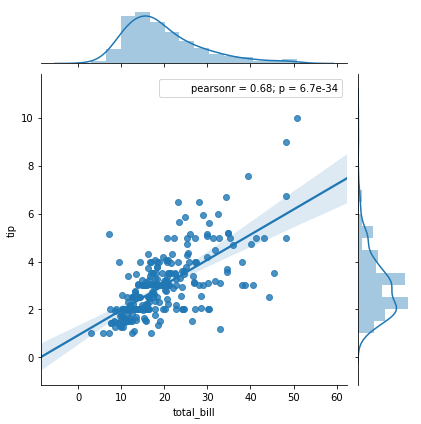

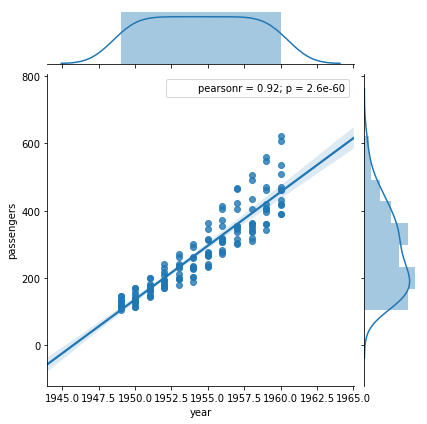

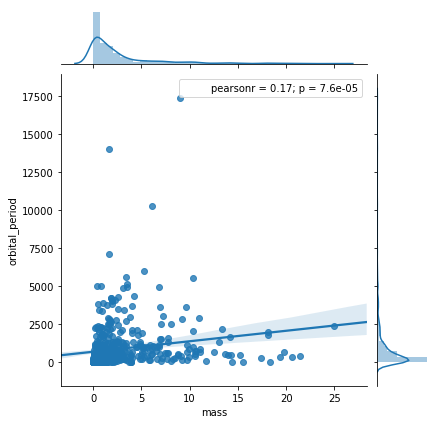

In [6]:
tips    = sns.load_dataset("tips")
sns.jointplot("total_bill", "tip", tips, kind='reg')

flights = sns.load_dataset('flights')
sns.jointplot("year", "passengers", flights, kind='reg')

planets = sns.load_dataset('planets')
sns.jointplot("mass", "orbital_period", planets, kind='reg')

plt.show()

References:

[7]

* https://github.com/mwaskom/seaborn-data/blob/master/tips.csv
* https://github.com/mwaskom/seaborn-data/blob/master/flights.csv
* https://github.com/mwaskom/seaborn-data/blob/master/planets.csv
* https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv

#### Extreme and curious cases

The charts consists of a scatter plot /w a regression line, a Pearson's r correlation, a p-value, and a histogram of the distributions of values /w a Gaussian density estimator. The reason for the p-value is that these plots tries to estimate the population's Pearson's r. It is assumed by the chart that the series are samples. The p-value represents the probability that the correlation is actually 0. You can safely ignore the p-value.

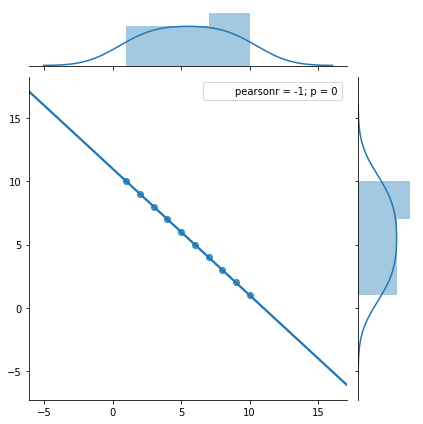

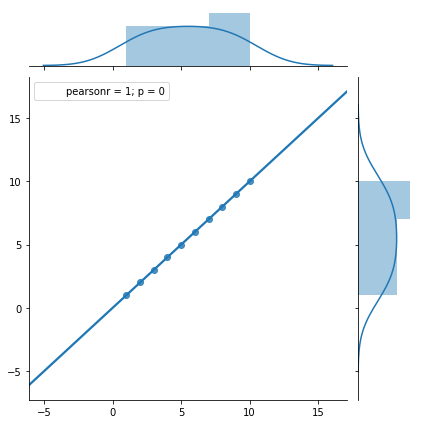

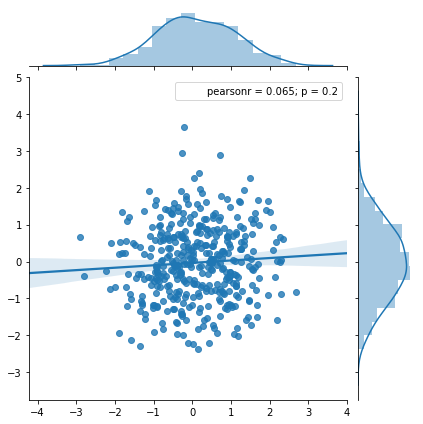

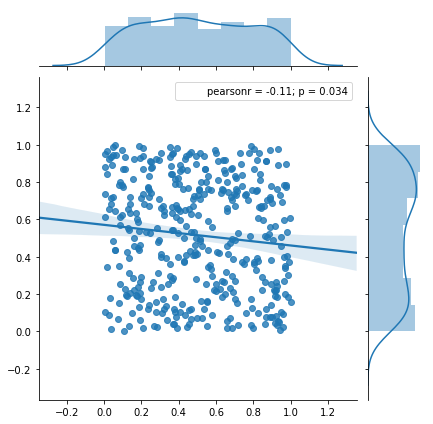

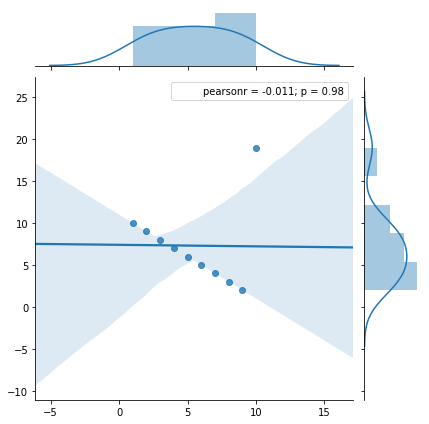

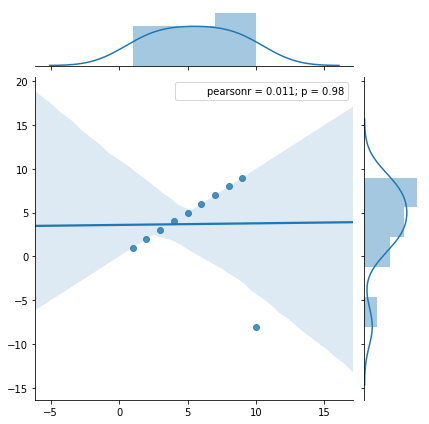

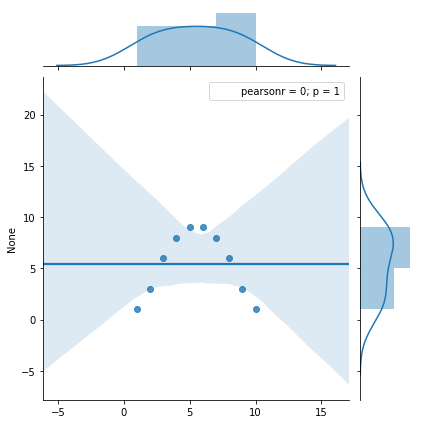

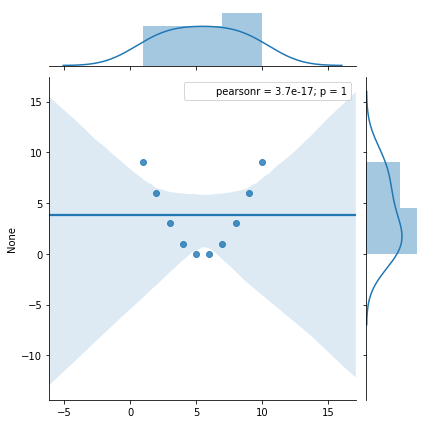

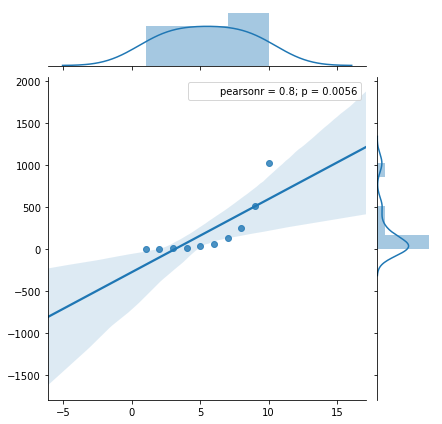

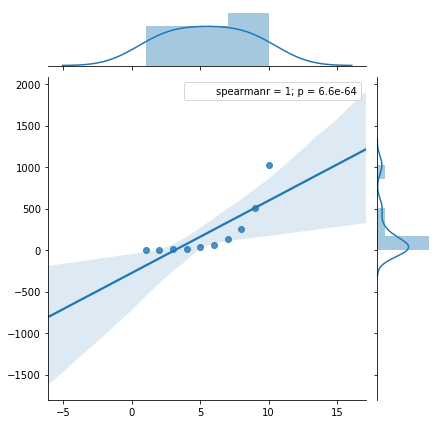

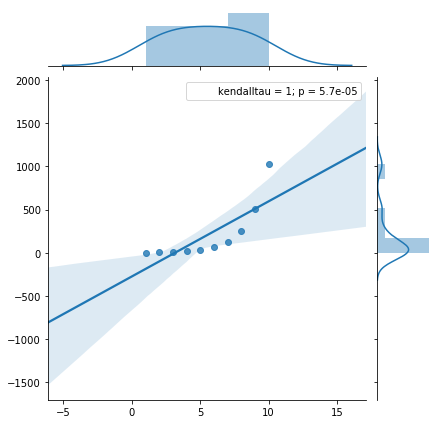

In [70]:
# Perfect negative correlation
x = np.arange(1,11,1)
y = np.arange(1,11,1)
y = np.flipud(y)

sns.jointplot(x, y, kind='reg')

# Perfect positive correlation
x = np.arange(1,11,1)
y = np.arange(1,11,1)

sns.jointplot(x, y, kind='reg')

# No correlation because equal symmetric distributions(normal)

sample_size = 400
x = st.norm.rvs(size=sample_size)
y = st.norm.rvs(size=sample_size)

sns.jointplot(x, y, kind='reg')

# No correlation because equal symmetric distributions(uniform)

sample_size = 400
x = st.uniform.rvs(size=sample_size)
y = st.uniform.rvs(size=sample_size)

sns.jointplot(x, y, kind='reg')

# No correlation because outlier

# Cancelled by positive outlier
x = np.arange(1,11,1)
y = np.arange(1,11,1)
y = np.flipud(y)
y[9] = 19.6

sns.jointplot(x, y, kind='reg')

# Cancelled by negative outlier
x = np.arange(1,11,1)
y = np.arange(1,11,1)
y[9] = -8.8

sns.jointplot(x, y, kind='reg')

# No correlation because symmetric curve

# Left Curve
x = np.arange(1,11,1)
y = pd.Series([1, 3, 6, 8, 9, 9, 8, 6, 3, 1])
sns.jointplot(x, y, kind='reg')

# Right Curve
x = np.arange(1,11,1)
y = pd.Series([9, 6, 3, 1, 0, 0, 1, 3, 6, 9])
sns.jointplot(x, y, kind='reg')

# Show all plots
plt.show()

#### Rank Correlation

Rank correlations measure wether the y-axis rises and falls with the x-axis, but is not affected by how much it rises or falls, as with Pearson's r. Thus, they are less vurnerable to outliers and can detect non-linear relationships.

#### Spearman's ${\displaystyle \rho }$

Spearman's ${\displaystyle \rho }$ is simply the Pearson's r of the rank of the values of two variables X and Y. We must give each x and each y a rank depending upon it's relative size within X and Y. Then we substitute that rank for the variable. At last we calculate the Pearson's r of the these ranks.

This process removes the impact of the magnitudes of the values.

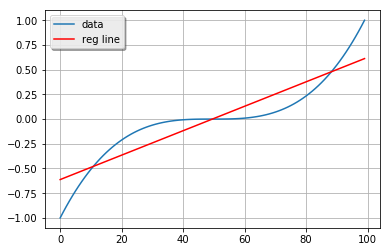

Spearman's r: 1.0
Pearon's r  : 0.916576252222


In [66]:
x = np.linspace(-1, 1, num=100)
y = [math.pow(i, 3) for i in x]

slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y=y)

def regress(x):
    
    return x*slope+intercept

plt.plot(y, label='data')
plt.plot(regress(x), color='red', label='reg line')
plt.grid()
plt.legend(shadow=True)
plt.show()

print("Spearman's r: " + str(st.spearmanr(x, b=y)[0]))
print("Pearon's r  : " + str(st.pearsonr(x, y)[0]))

#### Comparison between Pearson's r, Spearman's Rho and Kendall's Tau

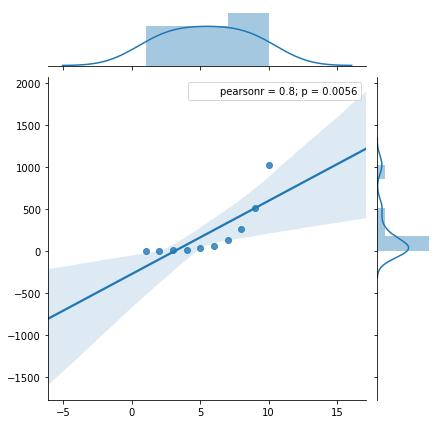

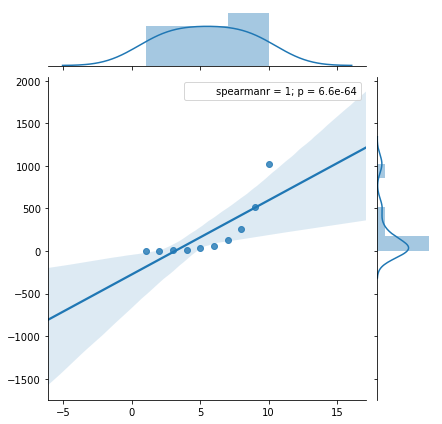

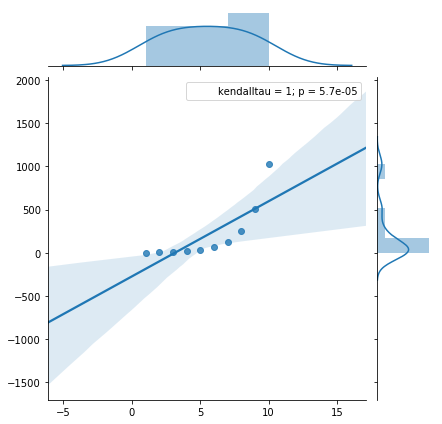

In [9]:
# Pearson's r for exponential
x = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
z = pd.Series([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
y = z.pow(x)
sns.jointplot(x.values, y.values, kind='reg')

# Spearmans's P for exponential
x = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
z = pd.Series([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
y = z.pow(x)
sns.jointplot(x.values, y.values, kind='reg', stat_func=spearmanr)

# Kendall's T for exponential
x = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
z = pd.Series([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
y = z.pow(x)
sns.jointplot(x.values, y.values, kind='reg', stat_func=kendalltau)

plt.show()

In [69]:
sample = st.norm.rvs(size=100)
print(st.normaltest(sample))

sample = st.uniform.rvs(size=100)
print(st.normaltest(sample))

array = np.arange(1,21,1)
print(st.normaltest(array))

NormaltestResult(statistic=1.0107121832673593, pvalue=0.60329071039884186)
NormaltestResult(statistic=22.04170555424767, pvalue=1.6357030106133874e-05)
NormaltestResult(statistic=3.9921161901757021, pvalue=0.13586981489872588)


#### Spearman's r

Spearman's r is a correlation coefficient for rank order. It cares about if y is higher og lower for an increase in x, not how much. That means it can be used on curves. It is simply the Pearson's r of the ranked datapoints. If there are 20 datapoints in each list, we divide them into 20 ranks. 